<a href="https://colab.research.google.com/github/Boris-Kuliev/My_First_Test_Repo/blob/main/code/%D0%9B%D0%A03_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%87%D0%BD%D1%8B%D0%BC%D0%B8_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Частота факт (Гц)  Частота номинал (Гц)        Дата  Часы
71             50.02                  50.0  2023-05-03    23
70             50.04                  50.0  2023-05-03    22
69             50.01                  50.0  2023-05-03    21
68             50.01                  50.0  2023-05-03    20
67             50.04                  50.0  2023-05-03    19
  Частота факт (Гц)  Частота номинал (Гц)        Дата  Часы
0             50.01                  50.0  2023-05-01     0
1             49.98                  50.0  2023-05-01     1
2             50.02                  50.0  2023-05-01     2
3             49.97                  50.0  2023-05-01     3
4              50.0                  50.0  2023-05-01     4
   Частота факт (Гц)  Частота номинал (Гц)        Дата  Часы  Разность (Гц)
0              50.01                  50.0  2023-05-01     0           0.01
1              49.98                  50.0  2023-05-01     1          -0.02
2              50.02                  50.0  20

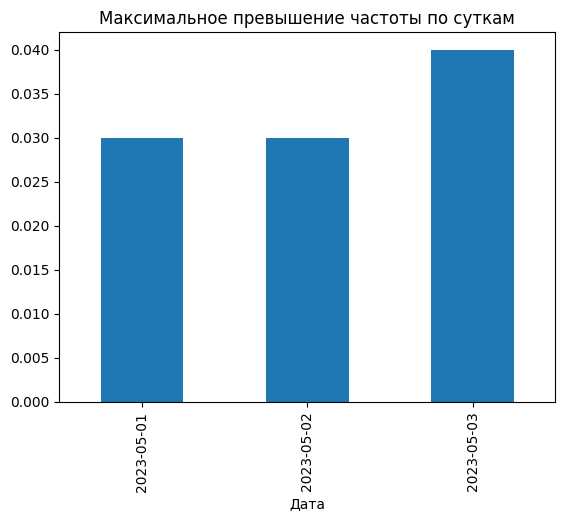

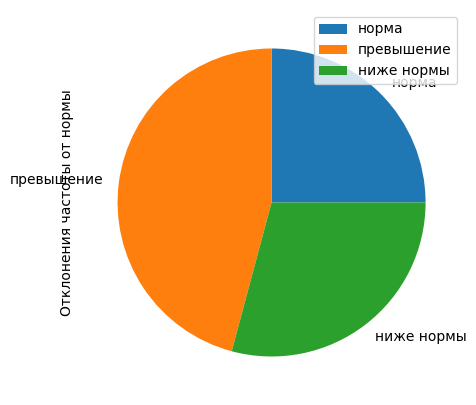

In [69]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Получение данных с сайта Системного оператора ЕЭС
# Использоуем способ, основанный на анализе содержимого кода страницы и извлечении из него нужных данных.
# Получаем статистику изменения частоты напряжения по часам за сутки ЕЭС РОССИИ
def create_url(date):
  url_begin = "https://www.so-ups.ru/functioning/ups/indicators/ees-freq/?tx_mscdugraph_pi%5Bcontroller%5D=Graph&tx_mscdugraph_pi%5Baction%5D=fullview&tx_mscdugraph_pi%5BviewDate%5D="
  url_end = "&tx_mscdugraph_pi%5BviewKpo%5D=1019"
  return url_begin + date + url_end

def parse_consumption(date):
  url = create_url(date)
  soup = BeautifulSoup(requests.get(url).content, 'html.parser')
  full_txt = str(soup)
  text_list_datetime = full_txt[full_txt.find('data-datax=') + len('data-datax=') + 1 : full_txt.find('data-datay=') - 2].split(',')
  text_list_freq = full_txt[full_txt.find('data-datay=') + len('data-datay=') + 1 : full_txt.find('data-date=') - 2].split(',')
  df = pd.DataFrame([text_list_datetime, list(map(float, text_list_freq))])
  return df.T

# Можно взять данные за несколько дней и "склеить" их в одну таблицу
df_freq = parse_consumption('2023-05-01')
df_freq = pd.concat([df_freq, parse_consumption('2023-05-02')], ignore_index=True)
df_freq = pd.concat([df_freq, parse_consumption('2023-05-03')], ignore_index=True)

# Добавим столбец с номинальной частотой 50 Гц
df_freq["2"] = [50.00 for i in range(0,len(df_freq.index))]

# Переименуем столбцы
df_freq.columns = ['Время', 'Частота факт (Гц)', 'Частота номинал (Гц)']

df_freq.to_csv('freq.csv')

df_freq_2 = df_freq.copy()

# Разделим столбец время на дату, часы и минуты
df_date = df_freq['Время'].str.split(' ', expand = True)
df_time = df_date[1].str.split(':', expand = True)
df_freq_2['Дата'] = df_date[0]
df_freq_2['Часы'] = df_time[0].astype('int')
#df_freq_2['Минуты'] = df_time[1].astype('int')
# удаляем столбца время
df_freq_2 = df_freq_2.drop(['Время'], axis='columns')

# Сортировка

# Отсортируем данные по времени (дата/часы) в обратном порядке
df_freq_2 = df_freq_2.sort_values(by=['Дата', 'Часы'], ascending=False)
print(df_freq_2.head())

# Отсортируем данные по времени (дата/часы) в прямом порядке
df_freq_2 = df_freq_2.sort_values(by=['Дата', 'Часы'])
print(df_freq_2.head())

# Добавление столбца с новыми данными, полученные путем преобразования имеющихся

# Явно укажем, что данные - вещественные числа
df_freq_2['Частота факт (Гц)'] = df_freq_2['Частота факт (Гц)'].astype('float')
df_freq_2['Частота номинал (Гц)'] = df_freq_2['Частота номинал (Гц)'].astype('float')

# Определим разность факта и номинала
df_freq_2['Разность (Гц)'] = df_freq_2['Частота факт (Гц)'] - df_freq_2['Частота номинал (Гц)'] 
print(df_freq_2.head())

# Выбор фрагмента таблицы по условию
# Выбрать данные на начало каждых суток
print(df_freq_2[df_freq_2['Часы']==0])
# Выбрать данные на начало и середину каждых суток
print(df_freq_2[(df_freq_2['Часы']==0) | (df_freq_2['Часы']==12)])
# Выбрать данные превышение частоты за сутки
print(df_freq_2[(df_freq_2['Дата']=='2023-05-02') & (df_freq_2['Разность (Гц)']>0)])

# Выбор фрагмента таблицы по номерам строк и столбцов
# номера идут с нуля
# Выбрать данные из первой строки и первого столбца
print(df_freq_2.iloc[0, 0])
# Выбрать данные из первые 12 строк и первые 4 столбца
print(df_freq_2.iloc[0 : 13, 0 : 4])

# Расчеты статистических показателей по сгруппированным данным
# Минимальная частота за сутки
print(df_freq_2.groupby('Дата')['Частота факт (Гц)'].min())
# Максимальныя частота за сутки
print(df_freq_2.groupby('Дата')['Частота факт (Гц)'].max())

# Построение гистограммы по данным
# разность частоты за сутки
#df_freq_2[df_freq_2['Дата']=='2023-05-01']['Разность (Гц)'].plot(kind = 'bar')
print()
# превышение частоты по суткам
df_freq_2.groupby('Дата')['Разность (Гц)'].max().plot(kind = 'bar', title='Максимальное превышение частоты по суткам')
print()

# Построение круговой даграммы
# Отклонение частоты от нормы
df = pd.DataFrame(
    {'Отклонения частоты от нормы': [
      df_freq_2[df_freq_2['Разность (Гц)']==0]['Разность (Гц)'].count(),
      df_freq_2[df_freq_2['Разность (Гц)']>0]['Разность (Гц)'].count(),
      df_freq_2[df_freq_2['Разность (Гц)']<0]['Разность (Гц)'].count()
    ]}, index=['норма', 'превышение', 'ниже нормы'])
df.plot.pie(y='Отклонения частоты от нормы', figsize=(5,5))
print()

# Построение интерактивного графика
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
import numpy as np

output_notebook() # чтобы график показывался прямо в блокноте

# 17. Построение графиков почасового отклонения частоты за каждые сутки
p = figure(plot_width = 800, plot_height = 400)

# Список цветов по количеству суток.
colors = ['yellow', 'green', 'cyan']

dates = ['2023-05-01','2023-05-02','2023-05-03']

for i in range(3):
  date = dates[i]

  # Выбор из таблицы данных за нужные сутки. 
  values = df_freq_2[df_freq_2['Дата'] == date]['Разность (Гц)'].values 
  
  # Построение линий.
  p.line(np.arange(0, 24), values, color = colors[i], legend_label = date, line_width = 3)

  # Построение маркеров.
  p.circle(np.arange(0, 24), values, color = colors[i], alpha=0.5, size = 8)

show(p)
